# Exploratory Data Analysis for Microsoft 

###  About: The notebook contains the analysis of  . The goal of this analysis is to offer meaningful insights to a new movie production company by answering the following questions. 

1. What genre of Movies will yield the best return.  
2. What runtime is ideal for the top 3 most profitable genres.
3. Does Runtime affect profit ? considering every min of movie production costs money.
4. What kind of Budget should be expected.
5. Which Director would be ideal. 

In [2]:
"""Getting all relevent imports into the file"""
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats
import statsmodels.api as sm

In [6]:
"""Our clean Data frame that contains information From IMDBs website and learn-co project repo"""
fulldf=pd.read_csv('newfulldf.csv')

In [7]:
fulldf.info() # Display the Data to make sure its as desired.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2241 entries, 0 to 2240
Data columns (total 11 columns):
Unnamed: 0                        2241 non-null int64
Title                             2241 non-null object
Movie Rating                      2241 non-null object
Year                              2241 non-null object
Gross Income in millions (USD)    2241 non-null float64
Movie Genre                       2241 non-null object
Movie Runtime                     2241 non-null int64
IMDb Rating                       2241 non-null float64
Votes                             2241 non-null float64
Budget in millions (USD)          2241 non-null float64
Profit percent                    2241 non-null float64
dtypes: float64(5), int64(2), object(4)
memory usage: 192.7+ KB


In [8]:
"""Funtion to plot bargraphs using the (Dataframe, xvalues,yvalues,string title)"""
# We will plot bar graphs more than twice so makes sense to have a funtion do this
def bargraph (Dataframe,xColumn,yColumn,str,):
    plt.figure(figsize=(10,5))
    sns.barplot(y=yColumn,x=xColumn)
    plt.title(str,weight='bold').set_fontsize('18')
    

In [71]:
"""Funtion to graph boxplot using the (Data,string title)"""
# We will make  boxplot graphs than twice so makes sense to have a funtion do this
def boxplot (Data,str,):
    plt.figure(figsize=(10,5))
    sns.boxplot(Data)
    plt.title(str,weight='bold').set_fontsize('18')
    plt.show()
    return Data.describe()

In [76]:
"""Funtion to Visualize the Runtime data (Data,String title)"""
def distribution (Data,str,):
    plt.figure(figsize=(10,5))
    graph = sns.distplot(Data)
    graph.axvline(Data.median().sum(),color='r',linestyle='-')
    graph.axvline(Data.mean().sum(),color='g',linestyle='--')
    graph.axvline(Data.mode().sum(),color='b',linestyle='-')
    plt.legend({'Median':Data.median(),'Mean':Data.mean(),'Mode':Data.mode()})
    plt.title(str,weight='bold').set_fontsize('18')
    plt.xlabel('Runtime in minutes')
    plt.show()
    return Data.describe() 

In [57]:
"""Funtion to Visualize scatter plot (x,y,line color,String title)"""
def scatter (x,y,data,linecolor,str):
    plt.figure(figsize=(10,8))
    sns.scatterplot(x=x, y=y,data=data,color=linecolor)
    plt.title(str,weight='bold').set_fontsize('18')

In [12]:
def remove_outlier (df): 
    testdf = df[['Profit percent','Gross Income in millions (USD)','Budget in millions (USD)','Movie Runtime']] 
    testdf = testdf[(np.abs(stats.zscore(testdf)) < 3).all(axis=1)]
    return testdf

### 1. What genre of Movies will yield the best return.

#### To answer this question lets first look at the genres of the top 20 Most profitable movies  

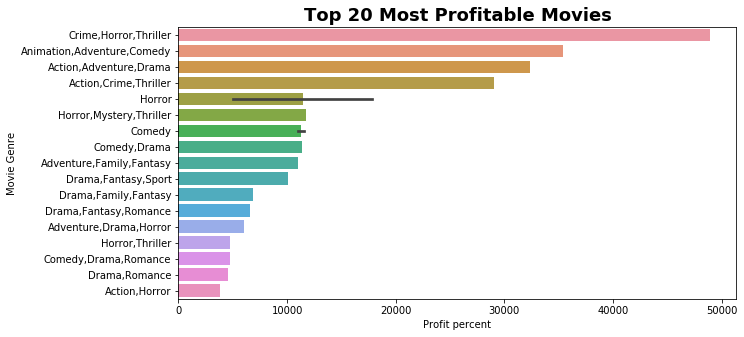

In [13]:
"""Look at the Genre of the Top 20 Most Profitable movies"""
group_df = fulldf.sort_values('Profit percent',ascending=False).reset_index().head(20)
bargraph(group_df,group_df['Profit percent'],group_df['Movie Genre'],"Top 20 Most Profitable Movies")


#### Looks like the movie genres our combinations, to examine sinlge genres we will have to split our data.

In [14]:
# split the genre combinations intoa list of genres in the fulldf using comma as the delimiter
fulldf['Movie Genre'] = fulldf['Movie Genre'].str.split(',')

In [47]:
#fulldf.head()# Display the Data to make sure its as desired

In [15]:
"""Explode to create new rows based on genre list while replicating all other column values."""
single_genre_df = fulldf.explode('Movie Genre')

In [92]:
#single_genre_df.info()# Display the Data to make sure its as desired

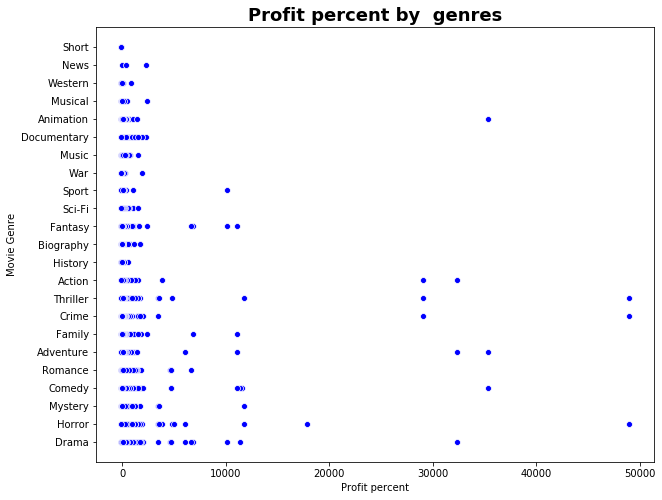

In [67]:
"""Visualtize to see over all Percent profit for top 3 most profitable movies"""
scatter ('Profit percent','Movie Genre',single_genre_df,'blue','Profit percent by  genres')

#### Looks like the profit percent return on every genre has outliers, so we should consider the median values for a more appropriate measure of its central tendency. Lets look at this again without outliers

In [17]:
"""Group the data by genre and find median of each group"""
single_genre_median_df = single_genre_df.groupby('Movie Genre').median()

In [18]:
#sort the profit percent  data in descending form 
single_genre_median_df=single_genre_median_df.sort_values('Profit percent',ascending=False).reset_index()


In [78]:
#single_genre_median_df.head(len(single_genre_df))# Display the Data to make sure its as desired.

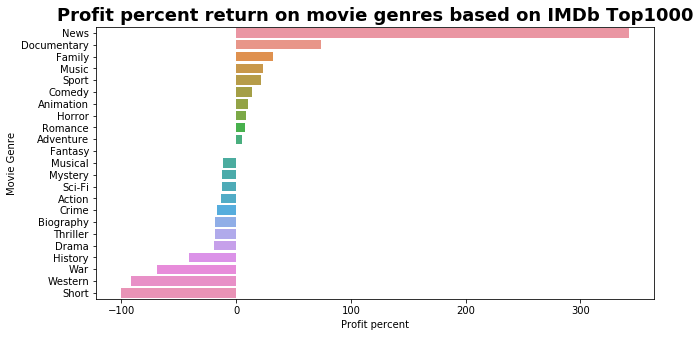

In [19]:
"""Look at the Proft Percent Return For each Genre """
bargraph(single_genre_median_df,single_genre_median_df['Profit percent'],single_genre_median_df['Movie Genre'],"Profit percent return on movie genres based on IMDb Top1000")

#### Before we proceed we want to make sure we have enough data in each genre 

In [20]:
"""Unique Genre list"""
genres = list (single_genre_df['Movie Genre'].unique())
#genres

In [42]:
"""Create a dictionary of data frames that have single genres and save the ones that have more than 30 data points"""
genres_df = {}
limit_genres_df = {}
limit_genres_list = []
for genre in genres:
    genres_df[genre] = single_genre_df[single_genre_df['Movie Genre'] == genre]
    if len(genres_df[genre]) > 0:
        limit_genres_list.append(genre)
        limit_genres_df[genre] =  single_genre_df[single_genre_df['Movie Genre'] == genre]
        print(genre,len(genres_df[genre]))


Drama 1202
Horror 198
Mystery 179
Comedy 876
Romance 383
Adventure 398
Family 178
Crime 428
Thriller 371
Action 553
History 62
Biography 172
Fantasy 174
Sci-Fi 140
Sport 54
War 24
Music 72
Documentary 38
Animation 130
Musical 16
Western 13
News 3
Short 14


#### Now that we know which genres have sufficient data to conduct our study Lets filter our orginal data frame with only these genres

In [23]:
"""create a new df with the filtered genre"""
new_df = single_genre_df[single_genre_df['Movie Genre'].isin(limit_genres_list)]
#df['Movie Genre'].unique()# View the genres of this new df to make sure

In [24]:
"""Group the data by genre and find median of each group"""
median_df = new_df.groupby('Movie Genre').median()

In [25]:
#sort the profit percent  data in descending form 
median_df = median_df.sort_values('Profit percent',ascending=False).reset_index()


In [26]:
"""Look at the Proft Percent Return For each Genre """
bargraph(median_df,median_df['Profit percent'],median_df['Movie Genre'],"Profit percent return on movie genres based on IMDb Top1000")

In [30]:
"""Save the top 3 genres as a list """
top3_list = median_df.loc[:2]['Movie Genre'].to_list()
top3_list

['Family', 'Music', 'Sport']

In [53]:
"""Save the top 3 genres as a pandas dataframe"""
top3_df = single_genre_df[single_genre_df['Movie Genre'].isin(top3_list)]

### INSIGHT 1:
#### Based on our analysis it seems Family , Music and Sport are the most profitable genres. Notably sci-fi which is lately been very popular overall is not a very profitable genre.

### 2. What runtime is ideal for the top 3 most profitable genres.

#### Lets look at whats happening to the Runtime for Family movies

 for i in range(0,len(top3_list)):
    distribution(genres_df[top3_list[i]],"Runtime of {} Movies ".format(top3_list[i]))
    genres_df[top3_list[i]]['Movie Runtime'].describe()

In [79]:
"""visualize the distribution of run time for Family movies"""
i = 0 # Enter 0, 1, 2 
distribution(genres_df[top3_list[i]]['Movie Runtime'],"Runtime of {} Movies ".format(top3_list[i]))


count    178.000000
mean     101.483146
std       20.092786
min       24.000000
25%       91.000000
50%       99.000000
75%      109.000000
max      186.000000
Name: Movie Runtime, dtype: float64

#### Looks like the runtime of Family movies is positively skewed so we wil use the median of 99 mins as a measure of its central tendency

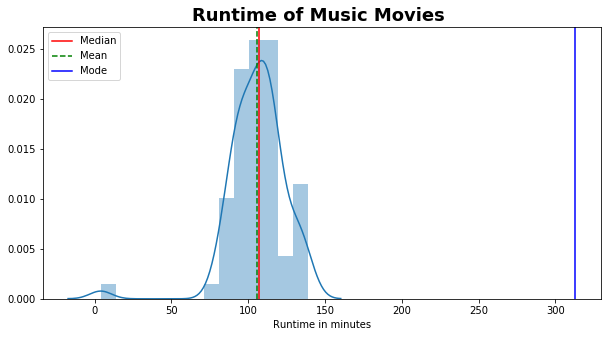

count     72.000000
mean     105.972222
std       18.841049
min        4.000000
25%       94.750000
50%      107.000000
75%      116.000000
max      139.000000
Name: Movie Runtime, dtype: float64

In [80]:
"""visualize the distribution of run time for Music based movies"""
i = 1 # # 1 most profitable
distribution(genres_df[top3_list[i]]['Movie Runtime'],"Runtime of {} Movies ".format(top3_list[i]))

#### Looks like the runtime of Music based movies is negaitively skewed so we wil use the median of 107 mins as a measure of its central tendency

In [81]:
"""visualize the distribution of run time for Sport based movies"""
i = 2 # # 1 most profitable
distribution(genres_df[top3_list[i]]['Movie Runtime'],"Runtime of {} Movies ".format(top3_list[i]))

count     54.000000
mean     111.833333
std       24.191648
min        0.000000
25%       99.250000
50%      112.000000
75%      124.000000
max      170.000000
Name: Movie Runtime, dtype: float64

#### Looks like the runtime of Family movies is negatively skewed so we wil use the median of 112 mins as a measure of its central tendency

### INSIGHT 2:
#### The top 3 most profitable genres have the following recommended run time , 
#### Family - 99 mins
#### Music - 107 mins
#### Sports - 112 mins

In [83]:
profitable_genres_df = single_genre_df[single_genre_df['Profit percent'] > 0]

In [86]:
"""Visualtize to see over all Run time for top 3 most profitable movies"""
boxplot(profitable_genres_df['Movie Runtime']," Movie Runtime of the all profitable genres")

count    2721.000000
mean      108.369717
std        18.367251
min        75.000000
25%        95.000000
50%       105.000000
75%       118.000000
max       242.000000
Name: Movie Runtime, dtype: float64

In [87]:
unprofitable_genres_df = single_genre_df[single_genre_df['Profit percent'] < 0]

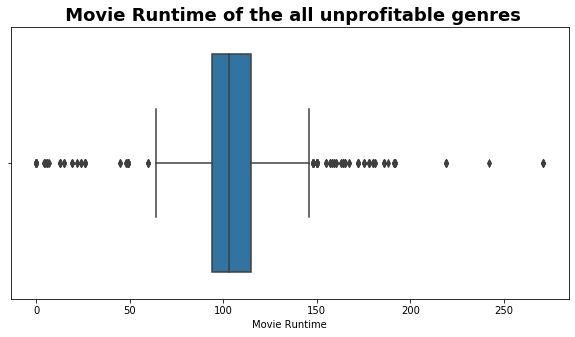

count    2954.000000
mean      105.009479
std        22.659853
min         0.000000
25%        94.000000
50%       103.000000
75%       115.000000
max       271.000000
Name: Movie Runtime, dtype: float64

In [89]:
"""Visualtize to see over all Run time for top 3 most profitable movies"""
boxplot(unprofitable_genres_df['Movie Runtime']," Movie Runtime of the all unprofitable genres")

### INSIGHT 3:
#### Overall theres not that much of a difference between run time of genres that made profit and the ones that did not. This suggests that run time has little effect on Percent profit . Perhaps further study that is more genre specific is needed.

In [291]:
#genres_df[top3_list[2]].describe()

### 4. What kind of Budget should be expected.

#### Lets look at the budget fo the top 20 most profitable movies  of our genres

In [90]:
"""Look at the Profit Percent Return of the Top 20 Grossing movies  """
scatter('Budget in millions (USD)','Profit percent',profitable_genres_df,'green',"Budget of profitable genres")

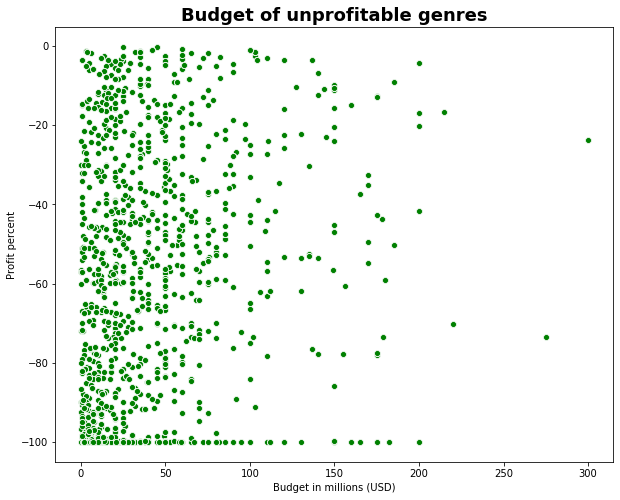

In [91]:
scatter('Budget in millions (USD)','Profit percent',unprofitable_genres_df,'green',"Budget of unprofitable genres")

#### We can see that none of the top Grossing movies are among the most profitable ,So does a big budget movie necessarily give a better return in terms of an investment? Down below we examine IMDb Top 1000 to answer this question.

In [188]:
"""Create a new data frame so we can populate it without outliers """
#New dataframe with only the Money figures to answer the buget question
testdf = fulldf[['Profit percent','Gross Income in millions (USD)','Budget in millions (USD)','Movie Runtime']] 


In [240]:
#testdf.info() # Check to make sure the dataframe is as desired.

In [189]:
"""Keep data values within  3 Standard deviation of each column to remove outliers, """
# Calculate the z scores of all entries , only keep data that is within 3 std
testdf=testdf[(np.abs(stats.zscore(testdf)) < 3).all(axis=1)]

In [242]:
#testdf.info() # Check to make sure the dataframe .

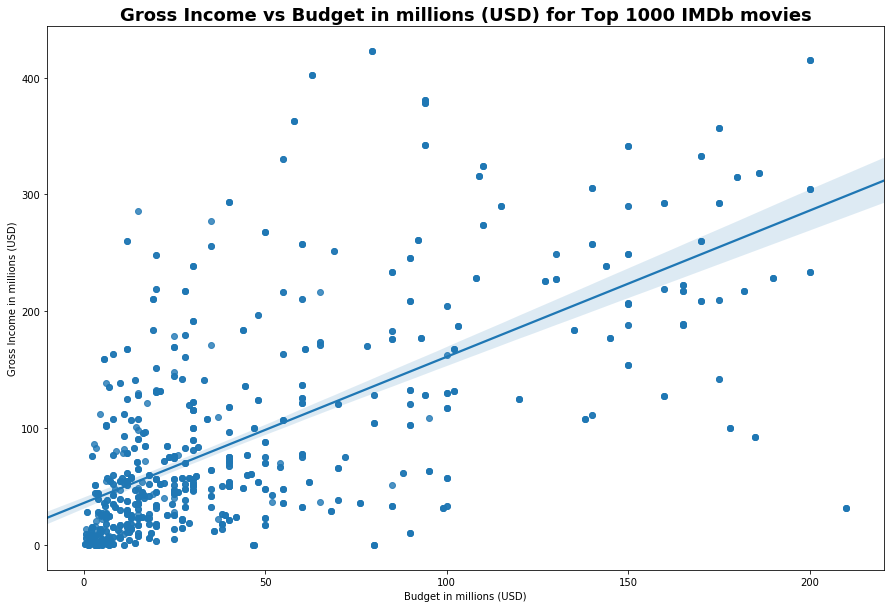

In [333]:
"""Visualtize to see what happens to Budget as Gross Income increases"""
plt.figure(figsize=(15,10))
sns.regplot(x=testdf['Budget in millions (USD)'], y=testdf['Gross Income in millions (USD)'],data=testdf)
plt.title('Gross Income vs Budget in millions (USD) for Top 1000 IMDb movies',weight='bold').set_fontsize('18')

#### As Budget increases Gross income also increases

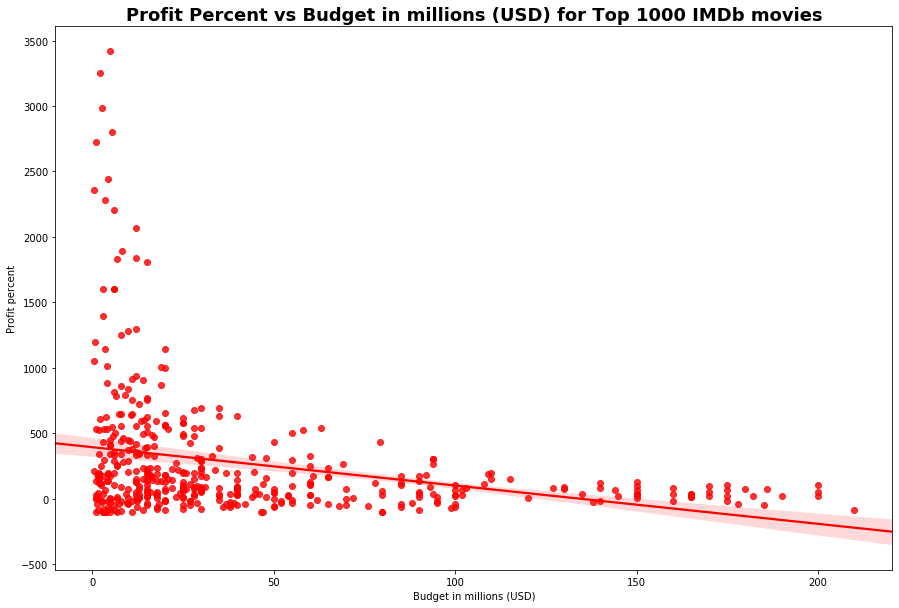

In [104]:
"""Visualtize to see what happens to Profit Percent as Gross Income increases"""
plt.figure(figsize=(15,10))
sns.regplot(x=testdf['Budget in millions (USD)'], y=testdf['Profit percent'],data=testdf,color='red')
plt.title('Profit Percent vs Budget in millions (USD) for Top 1000 IMDb movies',weight='bold').set_fontsize('18')

#### But as Budget increases percent profit actually decreases.

"""Calculate best fit line equation """
y = testdf['Profit percent'] 
x1 = testdf['Budget in millions (USD)']
x = sm.add_constant(x1)
results = sm.OLS(y,x).fit()
results.summary()

####  Although investing a larger amount could lead to a large return it also involves a lot more risk and a relatively smaller percent profit ! We would recommend a smaller budget to start, as examined below. 

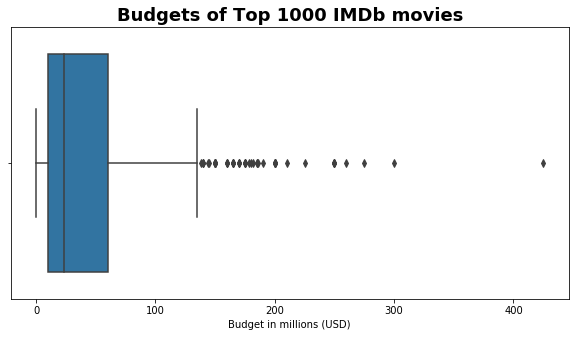

count    474.000000
mean      46.484499
std       58.688403
min        0.027000
25%       10.000000
50%       23.300000
75%       60.000000
max      425.000000
Name: Budget in millions (USD), dtype: float64

In [497]:
"""Look at the overall central tendency of Budget in millions(USD)"""
boxplot(fulldf['Budget in millions (USD)'],'Budgets of Top 1000 IMDb movies')

#### Since the Movie Budget has a lot of outliers it would be better to use the median of about 24 million as a measure of its central tendecy.

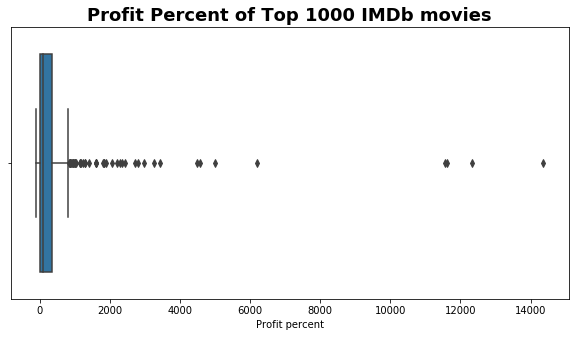

count      474.000000
mean       412.312573
std       1296.203181
min       -100.000000
25%         16.915000
50%        110.437963
75%        340.576923
max      14361.538462
Name: Profit percent, dtype: float64

In [525]:
"""Look at the overall central tendency of Percent Profit """

boxplot(fulldf['Profit percent'],'Profit Percent of Top 1000 IMDb movies')

#### Since the Percent Profit for movies has a lot of outliers it would be better to use the median of 110% as a measure of its central tendecy

### INSIGHT 1:
#### Based on our analysis it seems a budget of about 24 million would be a good starting point .
#### With a movie of this budget we can expect a return of about 110% based on the median return of Top 1000 movies whereas a 324 % return based on our regression model.

### 2. What Genres yields the best returns ?

In [138]:
# split the genre combinations intoa list of genres in the fulldf using comma as the delimiter
fulldf['Movie Genre'] = fulldf['Movie Genre'].str.split(',')

In [139]:
fulldf.head()# Display the Data to make sure its as desired.

Title Movie Rating  Year               Director  \
0       12 Years a Slave            R  2013          Steve McQueen   
1              127 Hours            R  2010            Danny Boyle   
2  2001: A Space Odyssey            G  1968        Stanley Kubrick   
3               21 Grams            R  2003  Alejandro G. I침치rritu   
4              25th Hour            R  2002              Spike Lee   

   Gross Income in millions (USD)                  Movie Genre  Movie Runtime  \
0                           56.67  [Biography, Drama, History]            134   
1                           18.34           [Biography, Drama]             94   
2                           56.95          [Adventure, Sci-Fi]            149   
3                           16.29     [Crime, Drama, Thriller]            124   
4                           13.06                      [Drama]            135   

   IMDb Rating     Votes  Budget in millions (USD)  Profit percent  
0          8.1  620427.0                      20.0      183.350000  
1          7.6  340696.0                      18.0        1.888889  
2          8.3  583421.0                      10.5      442.380952  
3          7.7  220537.0                      20.0      -18.550000  
4          7.6  167329.0                       4.5      190.222222

In [209]:
"""Explode to create new rows based on genre list while replicating all other column values."""
single_genre_df = fulldf.explode('Movie Genre')

In [210]:
single_genre_df.head()# Display the Data to make sure its as desired.

Title Movie Rating  Year       Director  \
0  12 Years a Slave            R  2013  Steve McQueen   
0  12 Years a Slave            R  2013  Steve McQueen   
0  12 Years a Slave            R  2013  Steve McQueen   
1         127 Hours            R  2010    Danny Boyle   
1         127 Hours            R  2010    Danny Boyle   

   Gross Income in millions (USD) Movie Genre  Movie Runtime  IMDb Rating  \
0                           56.67   Biography            134          8.1   
0                           56.67       Drama            134          8.1   
0                           56.67     History            134          8.1   
1                           18.34   Biography             94          7.6   
1                           18.34       Drama             94          7.6   

      Votes  Budget in millions (USD)  Profit percent  
0  620427.0                      20.0      183.350000  
0  620427.0                      20.0      183.350000  
0  620427.0                      20.0      183.350000  
1  340696.0                      18.0        1.888889  
1  340696.0                      18.0        1.888889

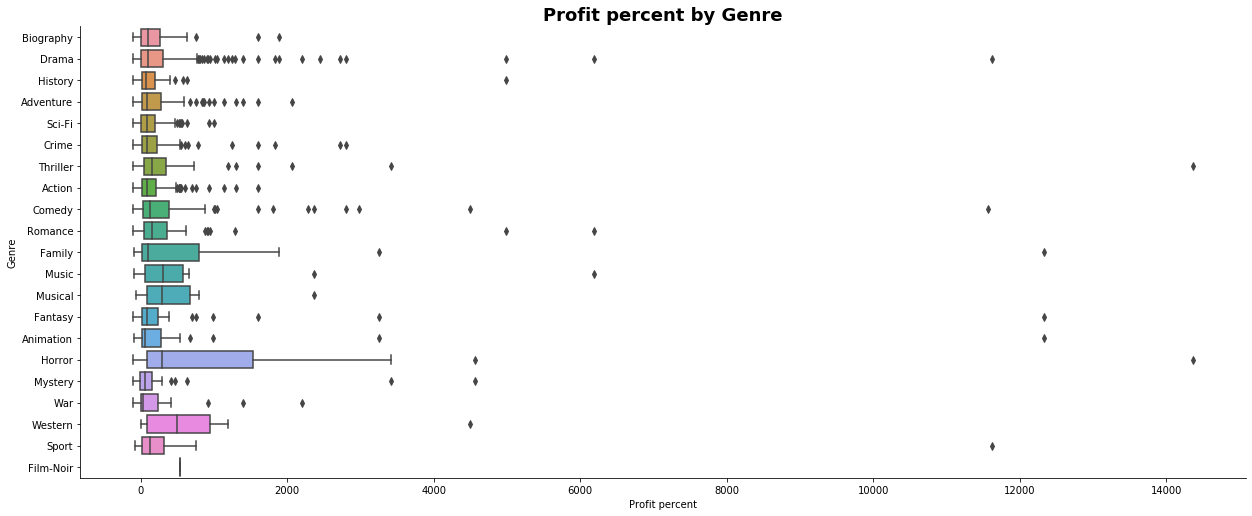

In [108]:
"""Visualize the spread for the profit percent of each genre"""
sns.catplot(y='Movie Genre', x='Profit percent', data=single_genre_df, kind='box', 
            height=7, aspect=2.5)
plt.title('Profit percent by Genre',weight='bold').set_fontsize('18')
plt.ylabel('Genre')
plt.xlabel('Profit percent')
plt.show()

### Looks like the profit percent return on every genre has outliers, so we should consider the median values for a more appropriate measure of its central tendency. Lets look at this again without outliers 

In [110]:
"""Group the data by genre and find median of each group"""
single_genre_median_df = single_genre_df.groupby('Movie Genre').median()

In [111]:
#sort the profit percent  data in descending form 
single_genre_median_df=single_genre_median_df.sort_values('Profit percent',ascending=False).reset_index()


In [482]:
#single_genre_df.head(len(single_genre_df))# Display the Data to make sure its as desired.

#### Lets look at the profit percent return for the movies based on median values for each genre

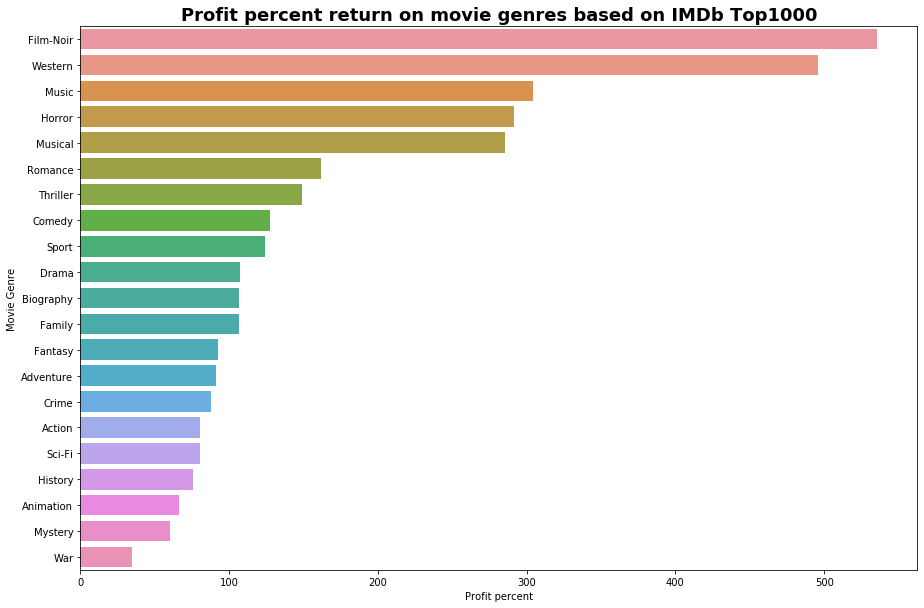

In [112]:
"""Look at the Proft Percent Return For each Genre """
bargraph(single_genre_median_df,single_genre_median_df['Profit percent'],single_genre_median_df['Movie Genre'],"Profit percent return on movie genres based on IMDb Top1000")

### INSIGHT 2:
#### Film-Noir , Western and Music were the most profitable genres .
#### Western and Sport Genres had the least amount of outliers suggesting that movie returns in these genres are less extreme compared to others and perhaps they perform more consistently.



### 3.What Genres were the most popular among the Top 1000 based on IMDb ratings ?

In [160]:
single_genre_df = single_genre_df.groupby('Movie Genre').median()# Group by genre and calculate median values 

In [164]:
single_genre_df = single_genre_df.sort_values('Votes',ascending=False).reset_index()


In [165]:
single_genre_df.head()

Movie Genre    Year  Gross Income in millions (USD)  Movie Runtime  \
0      Sci-Fi  2004.0                          78.905          119.5   
1      Action  2006.0                         138.535          122.0   
2     Mystery  2004.0                          56.000          123.0   
3   Adventure  2003.5                         178.435          124.5   
4    Thriller  2000.0                          57.370          117.0   

   IMDb Rating     Votes  Budget in millions (USD)  Profit percent  
0          8.0  576585.5                     43.50       80.517864  
1          7.8  488594.5                     60.00       80.593124  
2          7.9  466504.0                     35.00       60.012500  
3          7.9  456624.0                     82.15       91.230273  
4          7.8  413892.0                     25.00      149.172727

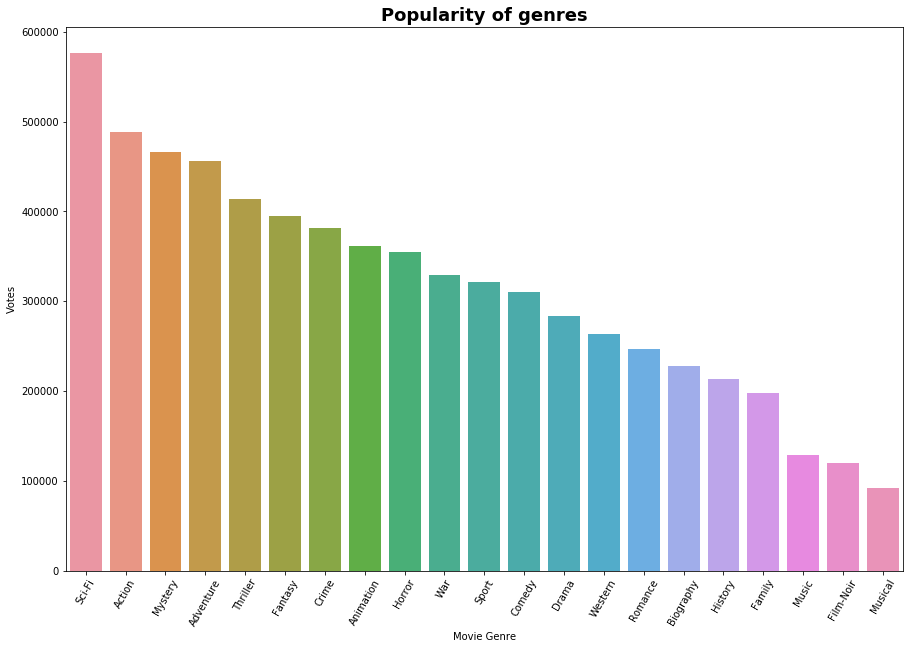

In [166]:
"""Look at the Proft Percent Return For each Genre """
plt.figure(figsize=(15,10))
graph=sns.barplot(y=single_genre_df['Votes'],x=single_genre_df['Movie Genre'])
plt.title("Popularity of genres",weight='bold').set_fontsize('18')
graph.set_xticklabels(graph.get_xticklabels(), rotation=60)
plt.show()

### INSIGHT 3:
#### Overall Sci-Fi is the most popular genre.
#### Although film-noir was the most profitable it isnt the most popular genre.
#### Among the top 10 most popular genres Thriller genre is the most profitable by far followed by Fantasy and War.


genres = list(single_genre_df['Movie Genre'].unique())
single_genre_df = fulldf.explode('Movie Genre')

Genres_profit = {}
for genre in genres:
    Genres_profit[genre] = single_genre_df[single_genre_df['Movie Genre'] == genre]

In [312]:
#print(Genres_profit)

fig, axs = plt.subplots(7, 3, figsize=(15, 24))
axs = axs.ravel()
for i in range(0,len(genres)):
    axs[i].catplot(Genres_profit[genres[i]]['Profit percent'])
    axe.set_title(genres[i])
   

### 3. What runtime is ideal for max profit percent 

In [180]:
#single_genre_df.head()# Display the Data to make sure its as desired.

In [169]:
group_df = fulldf.sort_values('Profit percent',ascending=False).reset_index().head(100)


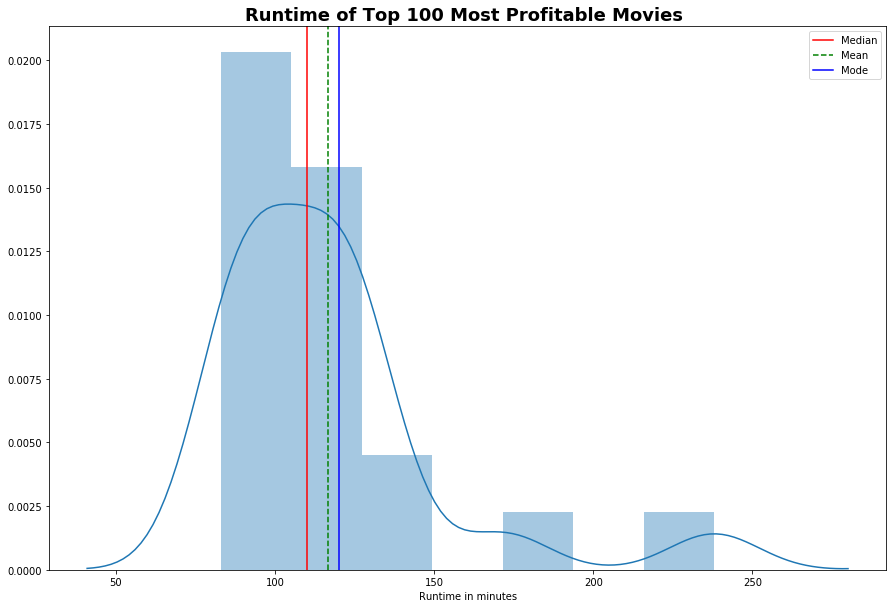

count     20.000000
mean     116.500000
std       35.870381
min       83.000000
25%       91.750000
50%      110.000000
75%      124.250000
max      238.000000
Name: Movie Runtime, dtype: float64

In [203]:
"""Visualize the Runtime data for top 1000 movies """
plt.figure(figsize=(15,10))
graph = sns.distplot(group_df['Movie Runtime'])
graph.axvline(group_df['Movie Runtime'].median().sum(),color='r',linestyle='-')
graph.axvline(group_df['Movie Runtime'].mean().sum(),color='g',linestyle='--')
graph.axvline(group_df['Movie Runtime'].mode().sum(),color='b',linestyle='-')
plt.legend({'Median':group_df['Movie Runtime'].median(),'Mean':group_df['Movie Runtime'].mean(),'Mode':group_df['Movie Runtime'].mode()})
plt.title('Runtime of Top 100 Most Profitable Movies ',weight='bold').set_fontsize('18')
plt.xlabel('Runtime in minutes')
plt.show()
group_df['Movie Runtime'].describe()

#### Looks like this data is positively skewed, so we will use the median as a measure of its central tendency. So The median runtime of top 100 most profitable movies is about 117 minutes.

In [177]:
single_genre_df=single_genre_df.sort_values('Movie Runtime',ascending=False).reset_index()

In [153]:
#single_genre_df.head()

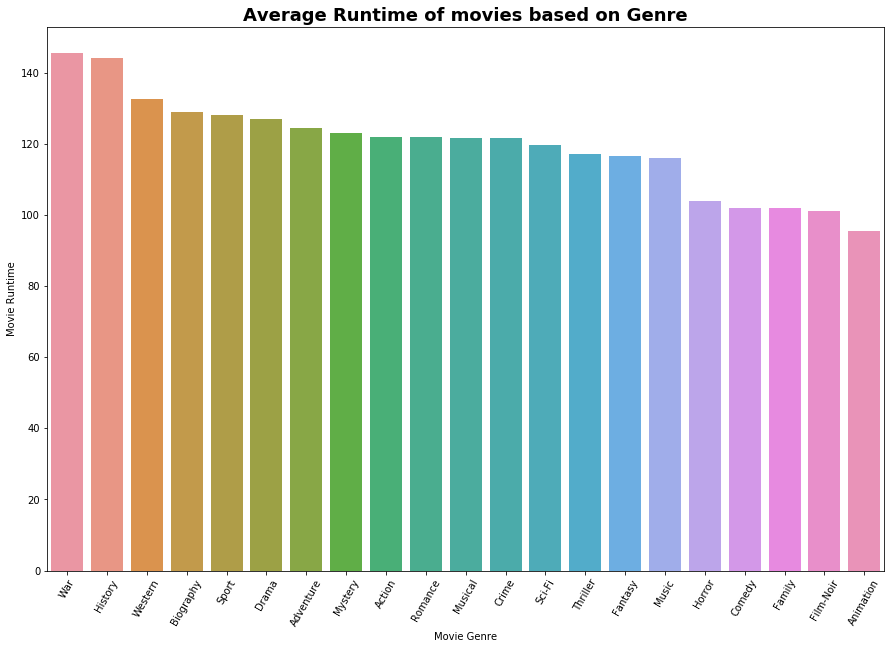

In [179]:
#bargraph(single_genre_df,single_genre_df['Movie Runtime'],single_genre_df['Movie Genre'],"Average Runtime of movies based on Genre")
#plt.text('2', ha='center', va='bottom')
"""Look at the Proft Percent Return For each Genre """
plt.figure(figsize=(15,10))
graph=sns.barplot(y=single_genre_df['Movie Runtime'],x=single_genre_df['Movie Genre'])
plt.title("Average Runtime of movies based on Genre",weight='bold').set_fontsize('18')
graph.set_xticklabels(graph.get_xticklabels(), rotation=60)
plt.show()

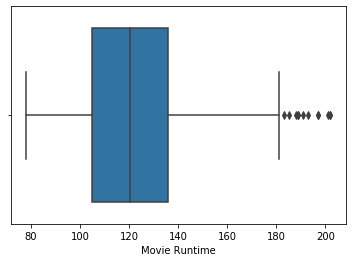

In [196]:
sns.boxplot(testdf['Movie Runtime'])


In [305]:
fulldf['Movie Runtime'].describe()

count    474.000000
mean     125.660338
std       28.658679
min       78.000000
25%      105.000000
50%      121.500000
75%      139.000000
max      242.000000
Name: Movie Runtime, dtype: float64

#### Looking at the data of the Top 20 most profitable movies , a runtime of approx 110 min is ideal. 


In [202]:
group_df = fulldf.sort_values('Profit percent',ascending=False).reset_index().head(20)


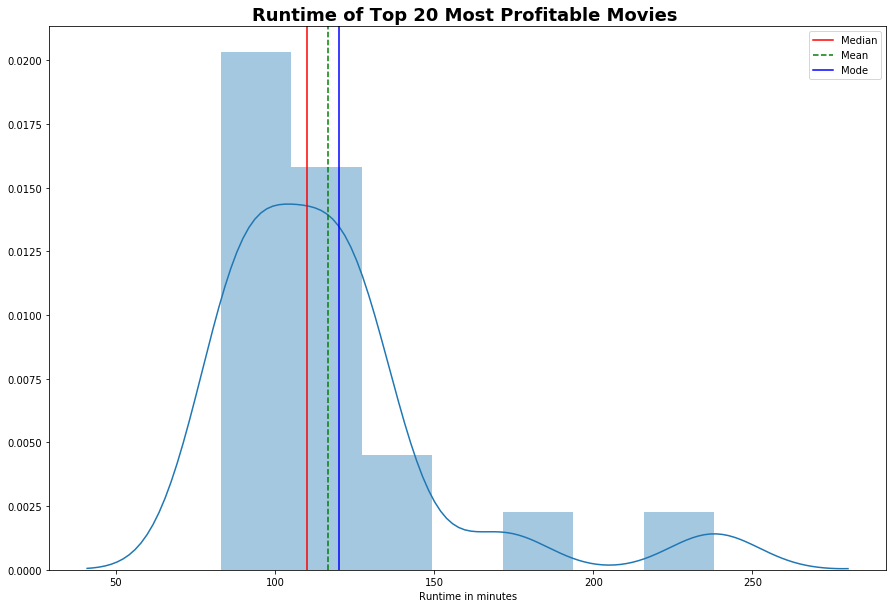

count     20.000000
mean     116.500000
std       35.870381
min       83.000000
25%       91.750000
50%      110.000000
75%      124.250000
max      238.000000
Name: Movie Runtime, dtype: float64

In [242]:
"""Visualize the Runtime data of the top 20 most profitable movies  """
plt.figure(figsize=(15,10))
graph = sns.distplot(group_df['Movie Runtime'])
graph.axvline(group_df['Movie Runtime'].median().sum(),color='r',linestyle='-')
graph.axvline(group_df['Movie Runtime'].mean().sum(),color='g',linestyle='--')
graph.axvline(group_df['Movie Runtime'].mode().sum(),color='b',linestyle='-')
plt.legend({'Median':group_df['Movie Runtime'].median(),'Mean':group_df['Movie Runtime'].mean(),'Mode':group_df['Movie Runtime'].mode()})
plt.title('Runtime of Top 20 Most Profitable Movies ',weight='bold').set_fontsize('18')
plt.xlabel('Runtime in minutes')
plt.show()
group_df['Movie Runtime'].describe()

#### Looking at the data of the Top 20 most profitable movies , a runtime of approx 110 min is ideal. Looks like the run time is decreasing as percent profit is increasing. We can do a best fit line to confirm this trend as seen below
.

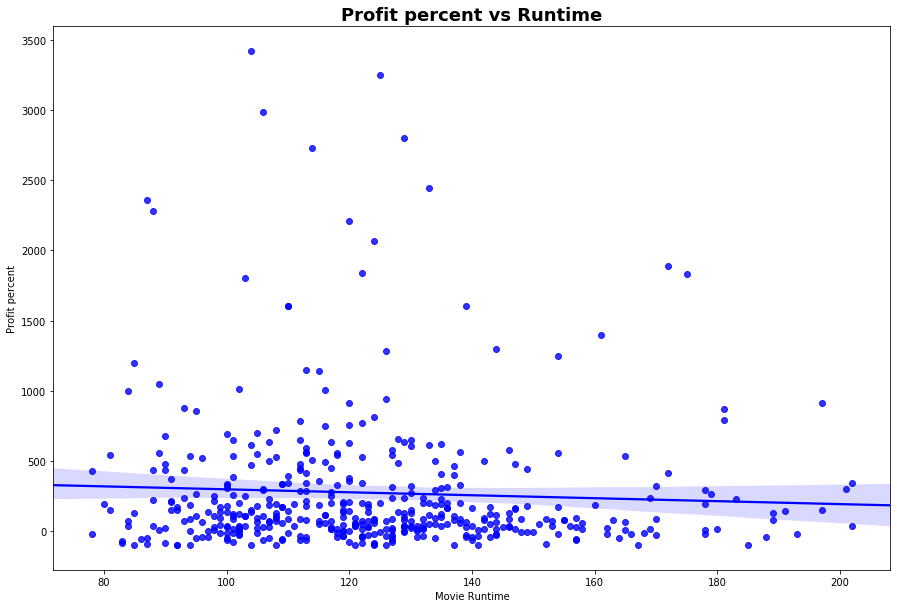

In [215]:
plt.figure(figsize=(15,10))
sns.regplot(x=testdf['Movie Runtime'], y=testdf['Profit percent'],data=testdf,color='blue')
plt.title('Profit percent vs Runtime',weight='bold').set_fontsize('18')

In [217]:
single_genre_df.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1218 entries, 0 to 473
Data columns (total 11 columns):
Title                             1218 non-null object
Movie Rating                      1218 non-null object
Year                              1218 non-null int64
Director                          1218 non-null object
Gross Income in millions (USD)    1218 non-null float64
Movie Genre                       1218 non-null object
Movie Runtime                     1218 non-null int64
IMDb Rating                       1218 non-null float64
Votes                             1218 non-null float64
Budget in millions (USD)          1218 non-null float64
Profit percent                    1218 non-null float64
dtypes: float64(5), int64(2), object(4)
memory usage: 154.2+ KB


In [226]:
"""Unique Genre list"""
genres = list (single_genre_df['Movie Genre'].unique())
genres

['Biography',
 'Drama',
 'History',
 'Adventure',
 'Sci-Fi',
 'Crime',
 'Thriller',
 'Action',
 'Comedy',
 'Romance',
 'Family',
 'Music',
 'Musical',
 'Fantasy',
 'Animation',
 'Horror',
 'Mystery',
 'War',
 'Western',
 'Sport',
 'Film-Noir']

In [241]:
"""Create a dictionary of unique Genre data frames"""
genres_df = {}
for genre in genres:
    genres_df[genre] = single_genre_df[single_genre_df['Movie Genre'] == genre]
    #if len(genres_df[genre])> 50:
    print(genre,len(genres_df[genre]))


Biography 65
Drama 314
History 27
Adventure 128
Sci-Fi 58
Crime 82
Thriller 69
Action 104
Comedy 103
Romance 47
Family 29
Music 12
Musical 6
Fantasy 36
Animation 40
Horror 14
Mystery 43
War 18
Western 8
Sport 14
Film-Noir 1


In [228]:
len(director_genres['Film-Noir'])

1

In [257]:
director_df = single_genre_df.groupby('Director').count()

In [261]:
director_df=director_df.sort_values('Title',ascending=False).reset_index().head(20)

In [262]:
director_df.head(25)

index              Director  Title  Movie Rating  Year  \
0       0      Steven Spielberg     22            22    22   
1       2     Christopher Nolan     21            21    21   
2       3       Martin Scorsese     21            21    21   
3       1         David Fincher     21            21    21   
4       4          Ridley Scott     17            17    17   
5       5        Clint Eastwood     16            16    16   
6       6      Denis Villeneuve     15            15    15   
7       7          Wes Anderson     14            14    14   
8       8         Peter Jackson     14            14    14   
9       9            Ron Howard     14            14    14   
10     10     Quentin Tarantino     13            13    13   
11     15  Francis Ford Coppola     12            12    12   
12     17             Brad Bird     12            12    12   
13     16   Wolfgang Reitherman     12            12    12   
14     11             Joel Coen     12            12    12   
15     14           Joss Whedon     12            12    12   
16     13         James Cameron     12            12    12   
17     12       Stanley Kubrick     12            12    12   
18     18       Robert Zemeckis     11            11    11   
19     19         Terry Gilliam     11            11    11   

    Gross Income in millions (USD)  Movie Genre  Movie Runtime  IMDb Rating  \
0                               22           22             22           22   
1                               21           21             21           21   
2                               21           21             21           21   
3                               21           21             21           21   
4                               17           17             17           17   
5                               16           16             16           16   
6                               15           15             15           15   
7                               14           14             14           14   
8                               14           14             14           14   
9                               14           14             14           14   
10                              13           13             13           13   
11                              12           12             12           12   
12                              12           12             12           12   
13                              12           12             12           12   
14                              12           12             12           12   
15                              12           12             12           12   
16                              12           12             12           12   
17                              12           12             12           12   
18                              11           11             11           11   
19                              11           11             11           11   

    Votes  Budget in millions (USD)  Profit percent  
0      22                        22              22  
1      21                        21              21  
2      21                        21              21  
3      21                        21              21  
4      17                        17              17  
5      16                        16              16  
6      15                        15              15  
7      14                        14              14  
8      14                        14              14  
9      14                        14              14  
10     13                        13              13  
11     12                        12              12  
12     12                        12              12  
13     12                        12              12  
14     12                        12              12  
15     12                        12              12  
16     12                        12              12  
17     12                        12              12  
18     11      

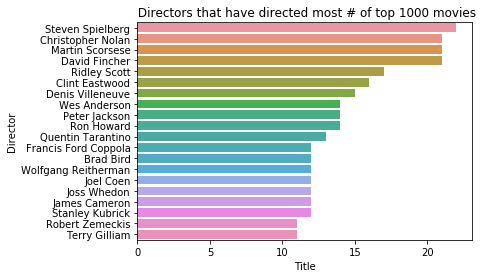

In [263]:

plt.title(" Directors that have directed most # of top 1000 movies")
plt13=sns.barplot(y=director_df.Director,x=director_df.Title)
